#Installl the dependency

In [2]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


#Importing Required Libraries
* Imporitng the required libraries and mounting the drive to train and evaluate the model

In [3]:
import numpy as np
import pandas as pd
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import os
import time

# Load Preprocessed Data

In [4]:
X_train = np.load("/content/drive/MyDrive/PG-PROJECT/X_train.npy")
X_val = np.load("/content/drive/MyDrive/PG-PROJECT/X_val.npy")
X_test = np.load("/content/drive/MyDrive/PG-PROJECT/X_test.npy")

y_train = np.load("/content/drive/MyDrive/PG-PROJECT/y_train.npy")
y_val = np.load("/content/drive/MyDrive/PG-PROJECT/y_val.npy")
y_test = np.load("/content/drive/MyDrive/PG-PROJECT/y_test.npy")

#TabNet float32

In [5]:
X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

# TabNet Classifier

In [6]:
clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    verbose=1,
    seed=42
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


# Train TabNet

In [7]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_val, y_val)],
    eval_name=["val"],
    eval_metric=["accuracy"],
    max_epochs=150,
    patience=10,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

epoch 0  | loss: 0.56699 | val_accuracy: 0.78162 |  0:00:02s
epoch 1  | loss: 0.23738 | val_accuracy: 0.90769 |  0:00:03s
epoch 2  | loss: 0.20112 | val_accuracy: 0.96015 |  0:00:05s
epoch 3  | loss: 0.19013 | val_accuracy: 0.94185 |  0:00:06s
epoch 4  | loss: 0.16302 | val_accuracy: 0.94673 |  0:00:08s
epoch 5  | loss: 0.16207 | val_accuracy: 0.94307 |  0:00:09s
epoch 6  | loss: 0.15512 | val_accuracy: 0.97397 |  0:00:10s
epoch 7  | loss: 0.15007 | val_accuracy: 0.94673 |  0:00:12s
epoch 8  | loss: 0.15719 | val_accuracy: 0.97641 |  0:00:13s
epoch 9  | loss: 0.17311 | val_accuracy: 0.98129 |  0:00:14s
epoch 10 | loss: 0.15406 | val_accuracy: 0.9695  |  0:00:17s
epoch 11 | loss: 0.12491 | val_accuracy: 0.94713 |  0:00:18s
epoch 12 | loss: 0.13314 | val_accuracy: 0.95161 |  0:00:19s
epoch 13 | loss: 0.14723 | val_accuracy: 0.95079 |  0:00:21s
epoch 14 | loss: 0.15193 | val_accuracy: 0.96096 |  0:00:22s
epoch 15 | loss: 0.13636 | val_accuracy: 0.94144 |  0:00:24s
epoch 16 | loss: 0.15423

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


# Predict & Evaluate

In [21]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Unique classes:", np.unique(y_train))

X_train shape: (11475, 5)
y_train shape: (11475,)
Unique classes: [0 1 2 3 4 5]


In [22]:
y_pred = clf.predict(X_test)
print("Prediction completed.")
print("Sample predictions:", y_pred[:10])

print(" Accuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print(" Cohen Kappa:", round(cohen_kappa_score(y_test, y_pred), 4))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Prediction completed.
Sample predictions: [0 2 2 0 0 2 0 2 2 2]
 Accuracy: 99.15 %
 Cohen Kappa: 0.9858
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1127
           1       1.00      1.00      1.00         9
           2       0.99      1.00      0.99      1044
           3       0.96      0.97      0.97       130
           4       1.00      0.88      0.93       129
           5       0.83      1.00      0.91        20

    accuracy                           0.99      2459
   macro avg       0.96      0.97      0.97      2459
weighted avg       0.99      0.99      0.99      2459



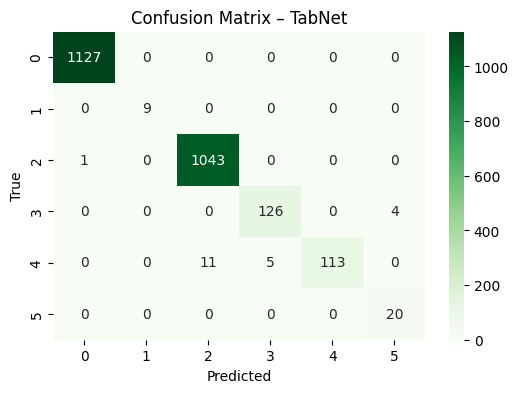

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix – TabNet")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

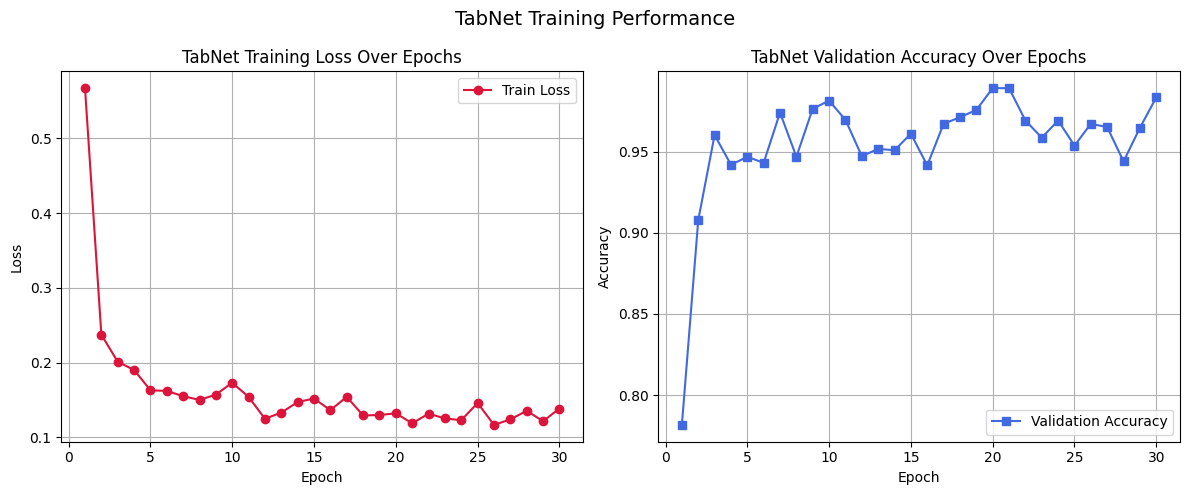

In [26]:
# 📈 Accuracy and Loss Graphs — only if history is populated
if clf.history["loss"] and clf.history["val_accuracy"]:
    epochs = range(1, len(clf.history["loss"]) + 1)
    train_loss = clf.history["loss"]
    val_accuracy = clf.history["val_accuracy"]

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))

    # Training Loss Curve
    axs[0].plot(epochs, train_loss, label="Train Loss", color="crimson", marker='o')
    axs[0].set_title("TabNet Training Loss Over Epochs")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Loss")
    axs[0].legend()
    axs[0].grid(True)

    # Validation Accuracy Curve
    axs[1].plot(epochs, val_accuracy, label="Validation Accuracy", color="royalblue", marker='s')
    axs[1].set_title("TabNet Validation Accuracy Over Epochs")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend()
    axs[1].grid(True)

    plt.suptitle("TabNet Training Performance", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("No training history available — skipping plot.")

#Confusion Matrix

#Save model

In [27]:
clf.save_model("tabnet_model")

Successfully saved model at tabnet_model.zip


'tabnet_model.zip'

#Model Size

In [28]:
tabnet_path = "tabnet_model.zip"
size_mb = os.path.getsize(tabnet_path) / (1024 * 1024)
print("Saved TabNet Model Size:", round(size_mb, 2), "MB")

Saved TabNet Model Size: 0.03 MB


#Inference Time

In [29]:
start = time.time()
_ = clf.predict(X_test[:1])
end = time.time()
print("⏱ Inference Time (1 sample):", round(end - start, 4), "seconds")

⏱ Inference Time (1 sample): 0.0152 seconds
